In [41]:
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize

# Read the CSV and Perform Basic Data Cleaning

In [30]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [31]:
# Create target and features Datasets
target = df["koi_disposition"]
features = df.drop("koi_disposition", axis=1)

# Create Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler

In [32]:
# Scale the data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/anaconda3/envs/Finance/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Comparing different Classifiers with default parameters

## Support Vector Machine

In [33]:
from sklearn.svm import SVC 

# Initialize the model
model = SVC(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Calculate score
svm_score = model.score(X_test_scaled,y_test) * 100

print(f'Support Vector Machine Performance on the test set: Score = {svm_score:.4f}%.')

/anaconda3/envs/Finance/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine Performance on the test set: Score = 79.7347%.


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Calculate score
lr_score = model.score(X_test_scaled,y_test) * 100

print(f'Logistic Regression Performance on the test set: Score = {lr_score:.4f}%.')

Logistic Regression Performance on the test set: Score = 83.3028%.


/anaconda3/envs/Finance/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/Finance/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Calculate score
rfc_score = model.score(X_test_scaled,y_test) * 100

print(f'Random Forest Performance on the test set: Score = {rfc_score:.4f}%.')

/anaconda3/envs/Finance/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Performance on the test set: Score = 88.2891%.


## Gradient Boosting Classification

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Calculate score
gbc_score = model.score(X_test_scaled,y_test) * 100

print(f'Gradient Boosting Performance on the test set: Score = {gbc_score:.4f}%.')

Gradient Boosting Performance on the test set: Score = 90.4849%.


## K-Nearest Neighbors Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
model = KNeighborsClassifier()

# Train the model
model.fit(X_train_scaled, y_train)

# Calculate score
knn_score = model.score(X_test_scaled,y_test) * 100

print(f'K-Nearest Neighbors Performance on the test set: Score = {knn_score:.4f}%.')

K-Nearest Neighbors Performance on the test set: Score = 81.1985%.


## Neural Network Classification

In [38]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
model = MLPClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Calculate score
mlp_score = model.score(X_test_scaled,y_test) * 100

print(f'Neural Network Performance on the test set: Score = {mlp_score:.4f}%.')

Neural Network Performance on the test set: Score = 89.0668%.


/anaconda3/envs/Finance/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Plot results

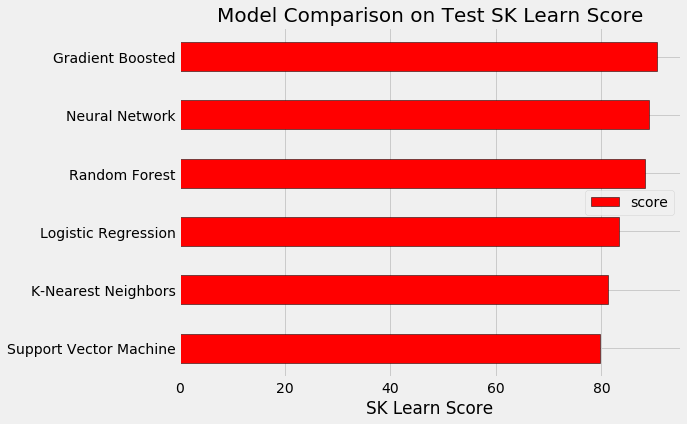

In [42]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','Neural Network'],
                                 'score': [lr_score, svm_score, rfc_score, 
                                         gbc_score, knn_score,mlp_score]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('SK Learn Score'); plt.xticks(size = 14)
plt.title('Model Comparison on Test SK Learn Score', size = 20);

## After testing 6 different models with default parameters, Gradient Boosting Classifier presented the best results.
## Let's tune this model with Grid Search

# Hyperparameter Tuning

In [63]:
# Create the GridSearchCV model with Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                  'max_features': max_features}

model = GradientBoostingClassifier(random_state= 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=hyperparameter_grid, cv = 2, verbose = 2, n_jobs = -1)

In [64]:
# Train the model with GridSearch
grid_search.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.4min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 900, 1100, 1500], 'max_features': ['auto', 'sqrt', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [65]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_features': 'log2', 'n_estimators': 100}
0.8990545898139677


## Let's tune the MLP Classifier with Grid Search

In [66]:
# Number of Hidden Layers
hidden_layer_sizes = [90,95,100,105,110]

# Number of trees used in the boosting process
max_iter = [100, 150, 200, 250, 300]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'hidden_layer_sizes': hidden_layer_sizes,
                       'max_iter': max_iter}

model = MLPClassifier(random_state= 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=hyperparameter_grid, cv = 2, verbose = 2, n_jobs = -1)

In [67]:
# Train the model with GridSearch
grid_search.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   56.3s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [90, 95, 100, 105, 110], 'max_iter': [100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [68]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'hidden_layer_sizes': 95, 'max_iter': 300}
0.8836535529124733


## The model with best results is the Gradient Boosting Classifier
## It's presented approximately 90% accuracy